In [1]:
# Import Dependencies
%matplotlib inline

import math, time, datetime, random
# Data Manupilation
import pandas as pd
import numpy as np
import datetime
from pandas_profiling import ProfileReport


# visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
gender_submission= pd.read_csv('gender_submission.csv')


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
len(train)

891

In [5]:
#profile = ProfileReport(train, title="Pandas Profiling Report")
#profile


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
len(test)

418

In [8]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


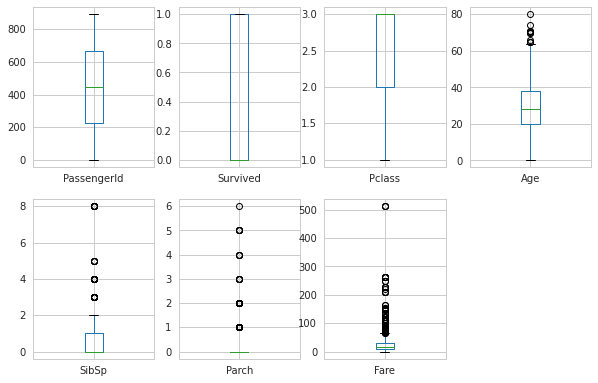

In [10]:
# Outliers in train dataset
train.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(10,10), layout=(3,4))
plt.show()

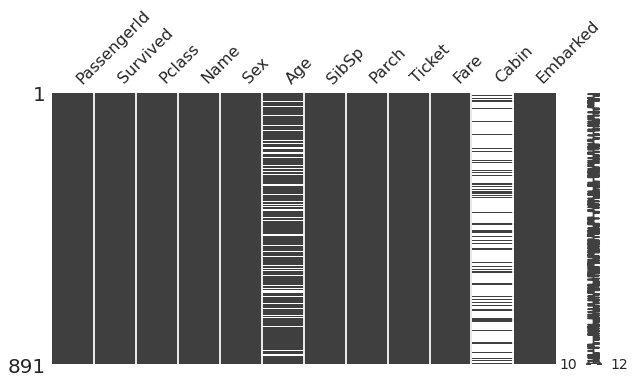

In [11]:
# Plot graphic of missing values
missingno.matrix(train, figsize=(10,5))

we have missing values in Age and Cabin columns
Now this information will help our EDA and figuring out what kind of data cleaning and preprocessing is needed.

In [12]:
train.loc[:,train.isnull().any()]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Analysis create two new dataframes
Create 1.Exploring Discretised Continuous Variables(which have been sorted into some kind of category).
       2.Exploring Continuous Variables

In [14]:
df_bin= pd.DataFrame() # Discretised Continuous Variables
df_con= pd.DataFrame() # Continuous Variables

In [15]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Target Feature: Survived
Passenger survived or not
0 = didn't survived
1 = survived


0    549
1    342
Name: Survived, dtype: int64

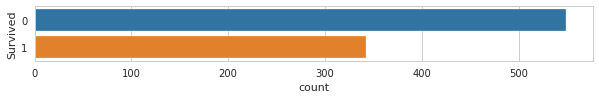

In [16]:
# How many people survived?
fig = plt.figure(figsize=(10,1))
sns.countplot(y='Survived', data=train);
train.Survived.value_counts()

In [17]:
# Lets add this to our subset dataframe
df_bin['Survived']= train['Survived']
df_con['Survived']= train['Survived']

In [18]:
df_bin.head()


,Survived
0,0
1,1
2,1
3,1
4,0


In [19]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# Feature: Pclass
Passenger ticket class
1= 1stclss, 2=2ndclass, 3=3rdclass

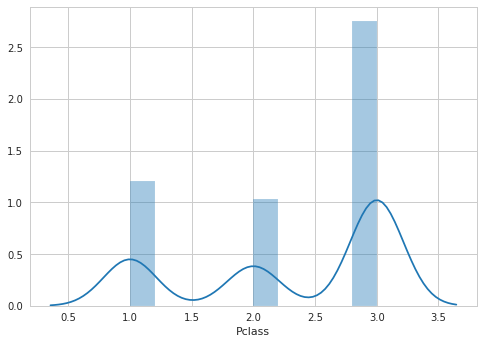

In [20]:
sns.distplot(train.Pclass)

In [21]:
train['Pclass'].isnull().sum()

0

In [22]:
df_bin['Pclass']= train['Pclass']
df_con['Pclass']= train['Pclass']


In [23]:
df_bin.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [24]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


# Feature: Name
Name of Passengers

In [25]:
train.Name.value_counts()

Dakic, Mr. Branko                            1
Lewy, Mr. Ervin G                            1
O'Sullivan, Miss. Bridget Mary               1
Myhrman, Mr. Pehr Fabian Oliver Malkolm      1
Smith, Mr. Richard William                   1
                                            ..
Brown, Mrs. James Joseph (Margaret Tobin)    1
Jacobsohn, Mr. Sidney Samuel                 1
Troupiansky, Mr. Moses Aaron                 1
Sage, Mr. Douglas Bullen                     1
Tomlin, Mr. Ernest Portage                   1
Name: Name, Length: 891, dtype: int64

# Feature: Sex
Passengers(Male or Female)

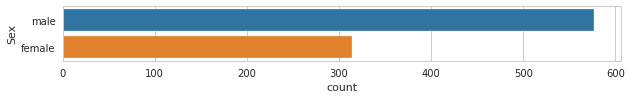

In [26]:
plt.figure(figsize=(10,1))
sns.countplot(y='Sex', data=train);

In [27]:
train['Sex'].isnull().sum()

0

In [28]:
df_bin['Sex']= train['Sex']
df_con['Sex']= train['Sex']
df_bin['Sex']= np.where(df_bin['Sex']== 'female',1,0)
df_con['Sex']= np.where(df_con['Sex']== 'female',1,0)


In [29]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [30]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


In [31]:
df_con.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


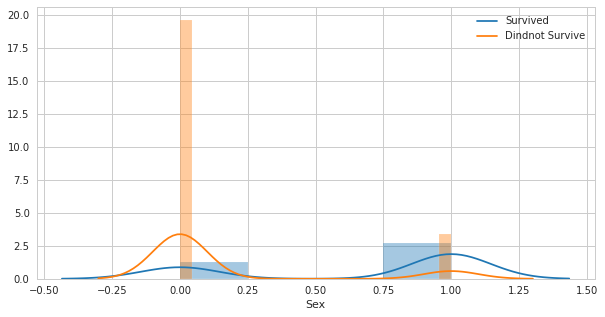

In [32]:
# Compare Sex variable to survival
# We can see this because both are binarys.
fig= plt.figure(figsize=(10,5))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Sex'], kde_kws={'label': 'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Sex'], kde_kws={'label': 'Dindnot Survive'})


# Feature: Age
Passenger Age

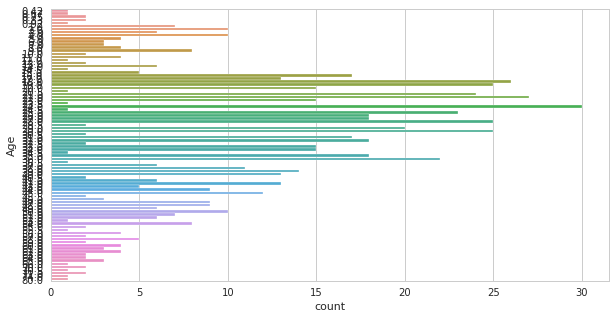

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(y='Age',data=train)

In [34]:
train['Age'].isnull().sum()

177

In [35]:
#df_bin['Age']= train['Age']
#df_con['Age']= train['Age']

In [36]:
#df_bin.drop('Age',axis='columns')
#df_con.drop('Age',axis='columns')

# Feature: SibSp
Sibling/spouse passengers

In [37]:
train['SibSp'].isnull().sum()

0

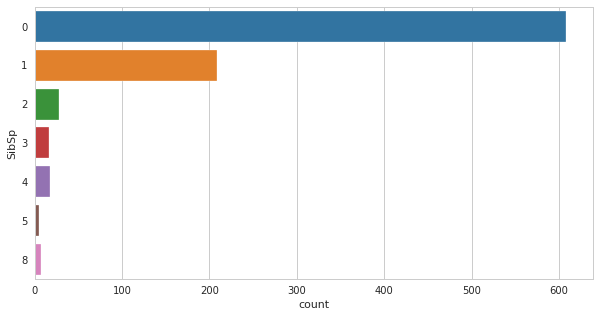

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(y='SibSp',data=train)

In [39]:
df_bin['SibSp']= train['SibSp']
df_con['SibSp']= train['SibSp']

In [40]:
df_bin.head()

,Survived,Pclass,Sex,SibSp
0,0,3,0,1
1,1,1,1,1
2,1,3,1,0
3,1,1,1,1
4,0,3,0,0


In [41]:
df_con.head()

,Survived,Pclass,Sex,SibSp
0,0,3,0,1
1,1,1,1,1
2,1,3,1,0
3,1,1,1,1
4,0,3,0,0


# Feature: Parch

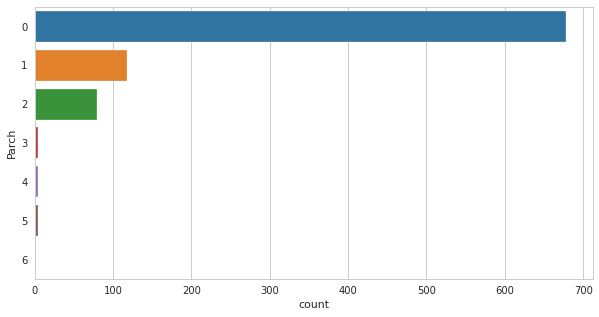

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(y='Parch',data=train)

In [43]:
train['Parch'].isnull().sum()

0

In [44]:
df_bin['Parch']= train['Parch']
df_con['Parch']= train['Parch']

In [45]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,0,1,0
1,1,1,1,1,0
2,1,3,1,0,0
3,1,1,1,1,0
4,0,3,0,0,0


In [46]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,0,1,0
1,1,1,1,1,0
2,1,3,1,0,0
3,1,1,1,1,0
4,0,3,0,0,0


# Feature: Ticket

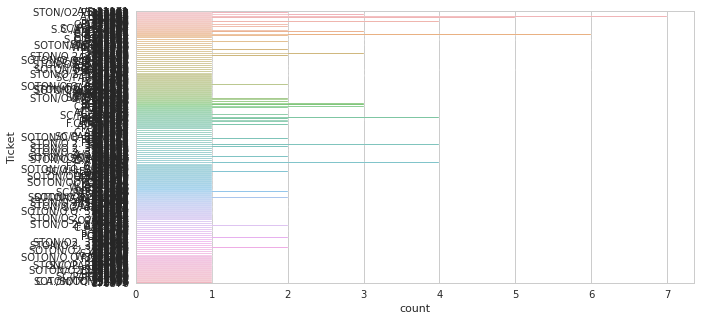

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(y='Ticket',data=train)

In [48]:
train['Ticket'].isnull().sum()

0

In [49]:
#df_bin['Ticket']= train['Ticket']
#df_con['Ticket']= train['Ticket']
#df_bin.drop(['Ticket'],axis='columns', inplace=True)
#df_con.drop(['Ticket'],axis='columns', inplace= True)

In [50]:
train['Ticket'].value_counts()[:20]

CA. 2343        7
1601            7
347082          7
347088          6
CA 2144         6
3101295         6
S.O.C. 14879    5
382652          5
W./C. 6608      4
347077          4
2666            4
17421           4
349909          4
LINE            4
19950           4
113760          4
113781          4
4133            4
PC 17757        4
110413          3
Name: Ticket, dtype: int64

In [51]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,0,1,0
1,1,1,1,1,0
2,1,3,1,0,0
3,1,1,1,1,0
4,0,3,0,0,0


# Feature: Fare

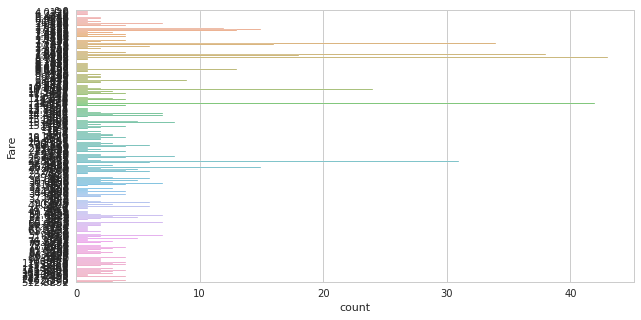

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(y='Fare',data=train)

In [53]:
train['Fare'].isnull().sum()

0

In [54]:
df_bin['Fare']= pd.cut(train['Fare'], bins=5)
df_con['Fare']= train['Fare']

In [55]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,0,1,0,"(-0.512, 102.466]"
1,1,1,1,1,0,"(-0.512, 102.466]"
2,1,3,1,0,0,"(-0.512, 102.466]"
3,1,1,1,1,0,"(-0.512, 102.466]"
4,0,3,0,0,0,"(-0.512, 102.466]"


In [56]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

# Feature: Cabin

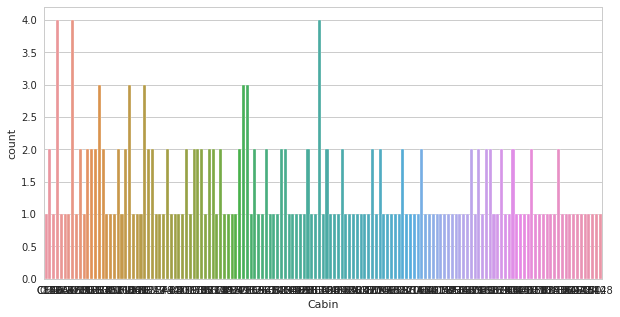

In [57]:
plt.figure(figsize=(10,5))
sns.countplot('Cabin', data=train)

In [58]:
train['Cabin'].isnull().sum()

687

In [59]:
train['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
F2             3
              ..
B102           1
E36            1
B4             1
B3             1
D6             1
Name: Cabin, Length: 147, dtype: int64

In [60]:
#df_bin.drop('Cabin',axis='columns')
#df_con.drop('Cabin',axis='columns')

# Feature: Embarked
Boarded 
C:Cherbourg, Q:Queenstown,S:Southampton

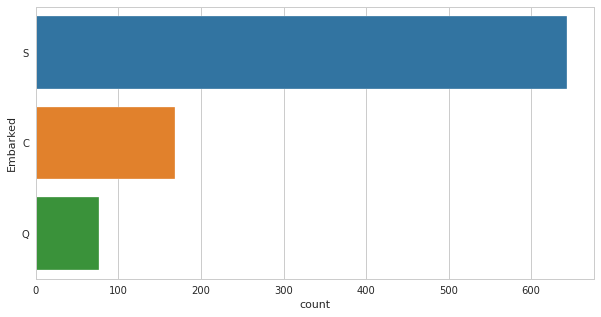

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(y='Embarked', data=train)

In [62]:
train['Embarked'].isnull().sum()

2

In [63]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [64]:
df_bin['Embarked']= train['Embarked']
df_con['Embarked']= train['Embarked']

In [65]:
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))


891
889


In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Feature Encoding

In [67]:
#OneHotEncoding variables
One_hot_cols= df_bin.columns.tolist()
One_hot_cols.remove('Survived')
pd.get_dummies(df_bin,columns=One_hot_cols)[:10]
#df_bin.drop(['Age','Cabin'], axis='columns')
#df_bin.drop(['Ticket_W/C'], axis='columns')
#df_con.drop(['Ticket_WE/P'], axis='columns')

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,0,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
8,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,1,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [68]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,S
1,1,1,1,1,0,71.2833,C
2,1,3,1,0,0,7.9250,S
3,1,1,1,1,0,53.1000,S
4,0,3,0,0,0,8.0500,S


In [78]:
# Label Encode all continuous values using LabelEncoder
df_con_enc = df_con.apply(LabelEncoder().fit_transform)
df_con_enc

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,0,1,0,18,2
1,1,0,1,1,0,207,0
2,1,2,1,0,0,41,2
3,1,0,1,1,0,189,2
4,0,2,0,0,0,43,2
...,...,...,...,...,...,...,...
886,0,1,0,0,0,85,2
887,1,0,1,0,0,153,2
888,0,2,1,1,2,131,2
889,1,0,0,0,0,153,0


# Start Building Machine Learning Models

Let's seperate the data

In [79]:
# Select the dataframe we want to use first for predicitions
selected_df = df_con_enc
selected_df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,0,1,0,18,2
1,1,0,1,1,0,207,0
2,1,2,1,0,0,41,2
3,1,0,1,1,0,189,2
4,0,2,0,0,0,43,2
...,...,...,...,...,...,...,...
886,0,1,0,0,0,85,2
887,1,0,1,0,0,153,2
888,0,2,1,1,2,131,2
889,1,0,0,0,0,153,0


In [80]:
# Split the dataframe into data and labels
x_train = selected_df.drop('Survived', axis=1) #data
y_train = selected_df.Survived #labels

In [81]:
x_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,2,0,1,0,18,2
1,0,1,1,0,207,0
2,2,1,0,0,41,2
3,0,1,1,0,189,2
4,2,0,0,0,43,2


In [82]:
x_train.shape

(889, 6)

In [84]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64